## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](attachment:./#intro)
- [Part I - Probability](attachment:./#probability)
- [Part II - A/B Test](attachment:./#ab_test)
- [Part III - Regression](attachment:./#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)



`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#df=pd.read_csv(r'C:\Users\PYarava\Desktop\pyth\Project_2\ab_data.csv',sep=',',header=0)
df=pd.read_csv("ab_data.csv",sep=',',header=0)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
print ("Number of rows in the dataset = ", num_rows)
#The otherways to get this information
#df.info()
#print(df.shape)
#len(df)
#df.tail(1)

Number of rows in the dataset =  294478


c. The number of unique users in the dataset.

In [4]:
num_uniq_users = df['user_id'].nunique()
print ("Number of unique users = ",num_uniq_users )

Number of unique users =  290584


d. The proportion of users converted.

In [5]:
port_users_conver = len(df[df['converted']==1]) / (df.shape[0])
print ("Portion of the users converted = ", round(port_users_conver,4))
#The otherways to get this information
#len(df.query("converted == 1")) / df.shape[0]
#df.query("converted == 1").count() / df.shape[0]
#(df.converted).mean()

Portion of the users converted =  0.1197


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#The number of times when the "landing_page" is a new_page and "group" is NE treatment.
num_lp_eq_np_grp_ne_trt = len(df[(df['landing_page']=='new_page') & (df['group']!='treatment')])
print ("Number of times the landing page is 'new_page' but group NE 'treatment' = ",num_lp_eq_np_grp_ne_trt)
#The otherways to get this information
#df[(df['landing_page']=='new_page') & (df['group']!='treatment')].count()

#The number of times when the "landing_page" is not a new_page and "group" is treatment.
num_lp_ne_np_grp_eq_trt = len(df.query("landing_page != 'new_page' & group == 'treatment'"))
print ("Number of times the landing page is not 'new_page' but group is 'treatment' = ",num_lp_ne_np_grp_eq_trt)
#The otherways to get this information
#df.query("landing_page != 'new_page' & group == 'treatment'").count()

Number of times the landing page is 'new_page' but group NE 'treatment' =  1928
Number of times the landing page is not 'new_page' but group is 'treatment' =  1965


f. Do any of the rows have missing values?

In [7]:
#df.info()
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:

# Number of rows where treatment is not aligned with new page
a1 = len(df.query("group == 'treatment' & landing_page != 'new_page'"))

# Number of rows where control is not aligned with old page
a2 = len(df.query("group == 'control' & landing_page != 'old_page'"))

# Number of rows where treatment is aligned with new page
a3 = len(df.query("group == 'treatment' & landing_page == 'new_page'"))

# Number of rows where control is aligned with old page
a4 = len(df.query("group == 'control' & landing_page == 'old_page'"))

#The otherways to get this information
#df.query(" group == 'treatment' & landing_page != 'new_page' ").count()

print("Number of rows where treatment is not aligned with new page = ",a1)
print("Number of rows where control is not aligned with old page = ",a2)
print("Number of rows where treatment is aligned with new page = ",a3)
print("Number of rows where control is aligned with old page = ",a4)
print("Total Number of rows = ",a1+a2+a3+a4)
print("Total Number of rows in the new data frame df2 = ",a3+a4)

#creating a temporary data frame-1 with group=treatment and landing_page=new_page
df_temp1=df[(df['group']=='treatment') & (df['landing_page']=='new_page')]

#creating a temporary data frame-2 with group=control and landing_page=old_page
df_temp2=df[(df['group']=='control') & (df['landing_page']=='old_page')]

#Combining the temporary data frames 1 & 2 to make a new data frame df2.
df2 = df_temp1.append(df_temp2,ignore_index=True)

# The new data set df2 meets the specifications from the quiz
# where The control group users are served with old_page and treatment group users are matched with the new_page
df2.shape


#The otherways to get this information
#df_temp=df.drop[((df['group']=='treatment') & (df['group']!='treatment').index, inplace = False)]

#df2=df.drop[ ( (df['group']=='treatment') & (df['group']!='treatment') ) & \
#            ( (df['group']=='control') & (df['group']!='old_page') )]

Number of rows where treatment is not aligned with new page =  1965
Number of rows where control is not aligned with old page =  1928
Number of rows where treatment is aligned with new page =  145311
Number of rows where control is aligned with old page =  145274
Total Number of rows =  294478
Total Number of rows in the new data frame df2 =  290585


C:\Users\pradeep\AppData\Local\Temp\ipykernel_8688\3998454456.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df_temp1.append(df_temp2,ignore_index=True)


(290585, 5)

In [9]:
# Double Check all of the incorrect rows (where treatment is not aligned with new_page) were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
# Double Check all of the incorrect rows (where control is not aligned with old_page) were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# The number of unique users in the new data frame
num_uniq_users_new_df = df2['user_id'].nunique()
print ("Number of unique users in the new data frame = ",num_uniq_users_new_df)

Number of unique users in the new data frame =  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#The number of duplicated user_id in the new data frame
num_dupli_user_id = df2.duplicated(subset=['user_id']).sum()
#num_dupli_user_id = len(df2[df2.duplicated(['user_id'])])
print ("The number of duplicated user_id in the new data frame = ",num_dupli_user_id)

# The information of duplicated user id
dupli_user_id = df2[df2.duplicated(['user_id'], keep=False)]
print("Duplicate Rows based on user_id", dupli_user_id, sep='\n')


#print (dupli_user_id)
#df2['user_id'].duplicated()

The number of duplicated user_id in the new data frame =  1
Duplicate Rows based on user_id
      user_id                   timestamp      group landing_page  converted
938    773192  2017-01-09 05:37:58.781806  treatment     new_page          0
1404   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [13]:
# Row information of the repeat user_id
x = (df2.loc[df2['user_id'] == 773192])
print(x)

      user_id                   timestamp      group landing_page  converted
938    773192  2017-01-09 05:37:58.781806  treatment     new_page          0
1404   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Removing the duplicated user_id
df2 = df2.drop_duplicates(subset=['user_id'],keep = 'first')
df2.shape
#df2.to_csv('out.csv',index=False)

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
port_users_conver_new_df = len(df2[df2['converted']==1]) / (df2.shape[0])
print ("Portion of the users converted in the new data frame = ", round(port_users_conver_new_df,4))

#The otherways to get this information
#len(df2.query("converted == 1")) / df2.shape[0]
#df2.query("converted == 1").count() / df2.shape[0]
#(df2.converted).mean()
#df2.converted.value_counts()[1]/len(df2.index)

Portion of the users converted in the new data frame =  0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
p_contr_conver = (df2.query('group == "control"')['converted'] == 1).mean()
print ("Probability of converted, given an individual was in the control group = ",round(p_contr_conver,4))

#The otherways to get this information
#p_contr_conver = len(df2.query('group == "control" & converted == 1')) / len(df2.query('group == "control"'))
#df2.groupby(["group", "converted"]).size()[1] / df2.group.value_counts()[1]

Probability of converted, given an individual was in the control group =  0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_treat_conver = (df2.query('group =="treatment"')['converted'] ==1).mean()
print ("Probability of converted, given an individual was in the treatment group = ",round(p_treat_conver,4))

#The otherways to get this information
#p_treat_conver2 = len(df2.query('group == "treatment" & converted == 1')) / len(df2.query('group == "treatment"'))
#df2.groupby(["group", "converted"]).size()[3] / df2.group.value_counts()[0]

Probability of converted, given an individual was in the treatment group =  0.1188


d. What is the probability that an individual received the new page?

In [18]:
p_new_page = len(df2[df2['landing_page'] =="new_page"]) / len(df2)
print("Probability that an individual received the new page = ",round(p_new_page,4))

#The otherways to get this information
#df2.landing_page.value_counts()[0]/len(df2)

Probability that an individual received the new page =  0.5001


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Probability of converted, given an individual was in the control group =  0.1204 <br>
Probability of converted, given an individual was in the treatment group =  0.1188 <br>
The results shows that the percentage of people converted in control group is slightly higher than the percentage of people converted in treatment group. However the difference in percentage is not significant and there is no strong evidence if one group leads to more conversions. In order to take a decision whether to implement new page or continue with old page, need to perform hypothesis testing.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis ($H_{0}$) = **$p_{new}$** - **$p_{old}$** <=0 <br>
Alternate Hypothesis ($H_{1}$) = **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
print(" The convert rate for  pnew  under the null = ",round(p_new,4))

# The value is same as in Part I, 4a
#port_users_conver_new_df = len(df2[df2['converted']==1]) / (df2.shape[0])
#The otherways to get this information
#df2.converted.value_counts()[1]/len(df2)
#len(df2[df2['converted']==1]) / len(df2)

 The convert rate for  pnew  under the null =  0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
print(" The convert rate for  pold  under the null = ",round(p_old,4))

# The value is same as in Part I, 4a
#port_users_conver_new_df = len(df2[df2['converted']==1]) / (df2.shape[0])
#The otherways to get this information
#df2.converted.value_counts()[1]/len(df2)
#len(df2[df2['converted']==1]) / len(df2)

 The convert rate for  pold  under the null =  0.1196


c. What is $n_{new}$?

In [21]:
n_new = len(df2[df2['group']=="treatment"])
print("n_new, the number of individuals in the treatment group = ",n_new)

#The otherways to get this information
#df2.query('group=="treatment"').count()

n_new, the number of individuals in the treatment group =  145310


d. What is $n_{old}$?

In [22]:
n_old = len(df2[df2['group']=="control"])
print("n_old, the number of individuals in the control group = ",n_old)

#The otherways to get this information
#df2.query('group=="treatment"').count()

n_old, the number of individuals in the control group =  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
np.random.seed(42)
new_page_converted = np.random.choice([1,0],size=n_new,p=[p_new,1-p_new])
new_page_converted
new_page_converted.mean()

0.11979216846741449

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
np.random.seed(42)
old_page_converted = np.random.choice([1,0],size=n_old,p=[p_old,1-p_old])
old_page_converted
old_page_converted.mean()

0.11980120324352603

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_diff_sim = new_page_converted.mean() - old_page_converted.mean()
p_diff_sim

-9.034776111541132e-06

In [26]:
#actual difference observed in ab_data.csv
observed_diff = p_treat_conver - p_contr_conver

print ("Actual difference observed in ab_data.csv = " ,observed_diff)
#p_treat_conver, p_contr_conver are calculated in Part I, 4b
# p_contr_conver = (df2.query('group == "control"')['converted'] == 1).mean()
# p_treat_conver = (df2.query('group =="treatment"')['converted'] ==1).mean()

Actual difference observed in ab_data.csv =  -0.0015782389853555567


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diff = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size=n_new,p=[p_new,1-p_new])
    old_page_converted = np.random.choice([1,0],size=n_old,p=[p_old,1-p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diff.append(diff)

Notes from reviewer:<br>
When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. The short reason is that numpy-based operations attack a computational problem based on vectors by computing large chunks simultaneously.
Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy. For example:<br>
  new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new <br>
  old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old <br>
  p_diffs = new_page_converted - old_page_converted <br>
Essentially, we are applying the null proportion to the total size of each page using the binomial distribution. Each element, for example, in np.random.binomial(n_new, p_new, 10000) results in an array with values like [17262, 17250, 17277...]. This array is 10000 elements large. <br>
When we divide it by n_new, Python broadcasts n_new for each element and we return a proportion for each element. <br>
This is essentially simulating, 10000, the new page conversion rate. <br>
We do this again for the old page. <br>
The difference of the two will result in a simulated difference array of length 10000 between the new page and old page conversions.<br>

How do I move away from the “for-loop” school of thought?<br>
https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought

In [28]:
#calculating p_diff without for loop
#p_diff_2 = []  
#new_page_converted_2 = np.random.binomial(n_new, p_new, 10000)/n_new
#old_page_converted_2 = np.random.binomial(n_old, p_old, 10000)/n_old
#p_diff_2 = new_page_converted_2 - old_page_converted_2

#plt.hist(p_diff_2);
#plt.axvline(x=observed_diff, color='red');

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>
Also, use plt.axvline() method to mark the actual difference observed in the df2 data (recall obs_diff), in the chart.

Tip: Display title, x-label, and y-label in the chart.

Text(0, 0.5, 'Count')

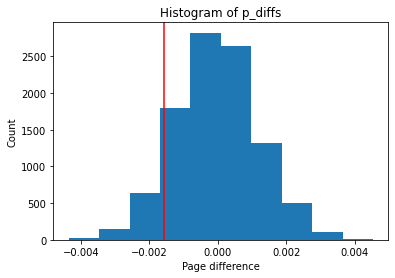

In [29]:
plt.hist(p_diff);
plt.axvline(x=observed_diff, color='red');

plt.title('Histogram of p_diffs') #title 
plt.xlabel('Page difference') # x-label
plt.ylabel('Count') # y-label

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
(p_diff > observed_diff).mean()

0.9062

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated is p-value and represents probability of observing the statistic, assuming that the null hypothesis is correct. 90.7% of the p_diff are greater than the actucal difference observed in ab_data.csv. As the p-value is 0.907, we failed to reject the null hypothesis and we do not have sufficient evidence to show that the new page conversions are better than old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = float(len(df2.query('landing_page == "old_page" & converted == 1')))
#convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
#convert_old = df2.query('landing_page == "old_page"')['converted'].sum()

convert_new = float(len(df2.query('landing_page == "new_page" & converted == 1')))
#convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
#onvert_new = df2.query('landing_page == "new_page"')['converted'].sum()

n_new = float(len(df2[df2['landing_page']=="new_page"]))
#n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
#n_new = len(df2.query('landing_page == "new_page"'))

n_old = float(len(df2[df2['landing_page']=="old_page"]))
#n_old1 = df2[df2['landing_page'] == 'old_page'].shape[0]
#n_old2 = len(df2.query('landing_page == "old_page"'))

print ("convert_old = ",convert_old,", convert_new = ",convert_new,", n_new = ",n_new,", n_old = ",n_old,)

convert_old =  17489.0 , convert_new =  17264.0 , n_new =  145310.0 , n_old =  145274.0


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [32]:
#z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='larger')
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
print("z_score = ",z_score, " p_value = ",p_value)

#Note from reviewer: negative z-score=-1.31 which is consistent with the negative actual difference = -0.001578


z_score =  -1.3109241984234394  p_value =  0.9050583127590245


In [33]:
from scipy.stats import norm
norm.ppf(1-(0.05)) #critical value of 95% confidence

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score of -1.31 is less than the critical value of 95% confidence level of 1.644, so we fail to reject the null hypothesis. The z-score and p-value represnts we fail to reject the null hypothesis. The findings matches with parts j. and k. The conversion rate for the old page and the new page are the same**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#adding an intercept column
df2['intercept'] = 1

#Adding an 'ab_page' column, which is 1 when an individual receives the treatment and 0 if control
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.tail(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        20:40:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page from the logistic regression model is 0.19 and is greater than 0.05, so the coefficient is not significant.
From part II, the alternate hypothesis is the conversion rate of new page is better than the conversion rate of old page. This assumes one-tailed test.
From logistic regression, the alternate hypothesis is the conversion rate of the old page is different from the conversion rate of the new page. This assumes two-tailed test.
The p-values are different from part II and logistic regression, because of differences in one-tailed, two-tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors is a good idea as these factor may contribute to the statistical analysis results and may leads to taking better decisions.
The disadvantage is that the model becomes more complex.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv("countries.csv")
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df.head()
df_new.head()

uniquevalues = df_new['country'].unique()
print('Unique values in column "country" ')
print(uniquevalues)


Unique values in column "country" 
['UK' 'US' 'CA']


In [38]:
### Create the necessary dummy variables

df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])[['US','UK','CA']]
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,1,0,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,1,0,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
### Fit Your Linear Model And Obtain the Results

df_new['ab_page_US'] = df_new['US'] * df_new['ab_page']
df_new['ab_page_UK'] = df_new['UK'] * df_new['ab_page']
df_new['ab_page_CA'] = df_new['CA'] * df_new['ab_page']
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_US,ab_page_UK,ab_page_CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [40]:
#Takin 'CA' as baseline
model2=sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page_US','ab_page_UK']])
results2=model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:               2.691e-05
Time:                        20:41:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0511      0.028      1.841      0.066      -0.003       0.105
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
ab_page_US    -0.0206      0.014     -1.505      0.132      -0.047       0.006
ab_page_UK     0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

The p-values for all these variables are greater than 0.05, so we fail to reject the null hypothesis. There is no sufficient evidence to show that 'country' has an impact on the conversion. <br>

#### Conclusion <br>

Based on the above assessment, it is demonstrated that the old page and new page have more or less equal chance of converting users. We fail to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.